In [29]:
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import h5py

from plot import PlotAx, STYLE_PATH
from data_loader import LoaderCrisL1

%matplotlib inline

In [30]:
in_dir = '/home/cali/data/GapFilling/CRISFull/'
filenames = os.listdir(in_dir)
in_files = [os.path.join(in_dir, filename) for filename in filenames]
in_files.sort()

# ranges_X = [(650., 1095.), (1210., 1750.), (2155., 2550.)]
# ranges_Y = [(1095.625, 1209.375), (1750.625, 2154.375), (2550.625, 2755.)]

ranges_X = [(650., 1095), ]
ranges_Y = [(1095.625, 1209.375), ]

# ranges_X = [(1210., 1750), ]
# ranges_Y = [(1750.625, 2154.375), ]

# ranges_X = [(2155., 2550.)]
# ranges_Y = [(2550., 2755.)]

from util import get_cris_full_train_data, get_range_index
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA

In [31]:
count = None # 加载全部的数据
X, Y = get_cris_full_train_data(in_files, x_ranges=ranges_X, y_ranges=ranges_Y, count=count)
X_col = X.shape[1]
Y_col = Y.shape[1]

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state = 42)

In [32]:
XY = pd.concat([X, Y], axis=1)

In [33]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802200 entries, 0 to 802199
Columns: 896 entries, 0 to 182
dtypes: float64(896)
memory usage: 5.4 GB


In [34]:
XY[XY < 0] = np.nan

In [35]:
XY = XY.dropna(axis=0)

In [36]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802069 entries, 0 to 802199
Columns: 896 entries, 0 to 182
dtypes: float64(896)
memory usage: 5.4 GB


In [38]:
XY = XY.astype('float32')
XY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802069 entries, 0 to 802199
Columns: 896 entries, 0 to 182
dtypes: float32(896)
memory usage: 2.7 GB


In [39]:
_XY = XY.iloc[:10000]

In [40]:
X_col = X.shape[1]
Y_col = Y.shape[1]
X_copy = _XY.iloc[:, :X_col]
Y_copy = _XY.iloc[:, X_col: X_col+Y_col]

In [41]:
X_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Columns: 713 entries, 0 to 712
dtypes: float32(713)
memory usage: 27.3 MB


In [33]:
X_copy.shape

(10000, 2211)

In [34]:
Y_copy.shape

(10000, 1158)

In [29]:
_XY.loc[(_XY < 0.02).sum(axis=1) > 0]

,0,1,2,3,4,5,6,7,8,9,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157
0,41.548255,41.346758,40.979126,40.927199,40.795578,40.661018,40.657496,40.050896,40.323760,40.275085,...,0.022859,0.040950,0.055038,0.041530,0.032360,0.032457,0.029311,0.036350,0.032049,0.046630
1,41.499610,41.569813,41.013948,40.848173,40.717989,40.269375,40.325688,39.774102,39.957720,39.962025,...,0.034439,0.038132,0.042056,0.027088,0.021629,0.035501,0.035620,0.021302,0.032001,0.040908
2,42.252550,42.002895,41.444824,41.581792,41.590599,41.293592,41.496075,41.252189,41.221055,40.644304,...,0.037371,0.035419,0.019343,0.003402,0.002528,0.023124,0.035768,0.032725,0.032316,0.024927
3,41.977035,41.550358,40.982253,40.957979,40.803119,40.692629,41.118042,40.628426,40.949347,40.864425,...,0.013610,0.025799,0.043625,0.033818,0.008062,0.006454,0.039704,0.046461,0.029676,0.031239
4,40.430349,40.417046,39.603995,39.309555,39.194083,38.776330,39.170875,38.959548,39.327866,38.853004,...,0.049875,0.049422,0.046320,0.037592,0.043862,0.043905,0.037383,0.031752,0.028284,0.043512
5,40.503677,39.975422,39.655268,39.910621,39.937476,39.321590,39.494836,38.860231,39.087690,38.790915,...,0.028645,0.023389,0.018139,0.033737,0.047009,0.047537,0.032096,0.016072,0.012330,0.019915
6,41.065312,41.010593,40.321521,40.190363,40.352888,39.999144,39.574977,39.102871,39.426899,39.180933,...,0.015560,0.000983,0.021941,0.046993,0.049202,0.047669,0.039339,0.036516,0.036864,0.033130
7,40.984904,40.714677,40.095057,39.932648,39.649714,39.387042,39.869466,39.547289,39.797771,39.653730,...,0.035061,0.046806,0.039155,0.041187,0.041600,0.028265,0.026300,0.034152,0.034016,0.025034
8,38.773189,39.077341,38.848544,38.815367,38.497021,37.832092,38.153037,37.782888,37.922537,37.836865,...,0.012474,0.003258,0.010741,0.037603,0.048015,0.036107,0.021973,0.022169,0.033374,0.029113
9,39.280316,38.754060,38.147844,38.346875,38.127754,37.706626,38.122248,37.996140,38.224798,37.965788,...,0.042359,0.025671,0.006037,0.021431,0.027565,0.026126,0.030193,0.021553,NaN,0.015745


In [30]:
_XY.shape

(10000, 3369)

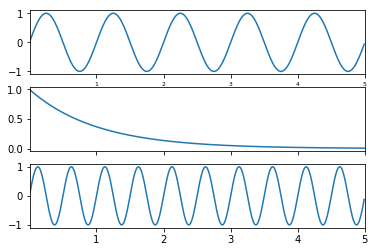

In [2]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.exp(-t)
s3 = np.sin(4*np.pi*t)

ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.xlim(0.01, 5.0)
plt.show()


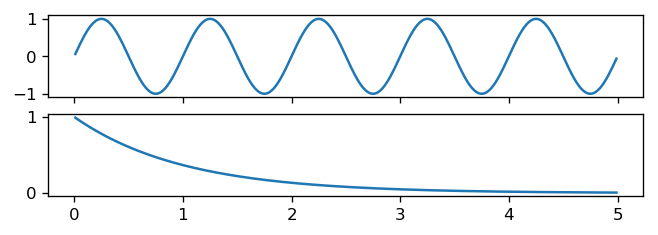

In [11]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.exp(-t)
s3 = np.sin(5*np.pi*t)

fig = plt.figure(figsize=(6.4, 2), dpi=120)
ax1 = plt.subplot2grid((2, 1), (0, 0))
ax2 = plt.subplot2grid((2, 1), (1, 0), sharex=ax1)
ax1.plot(t, s1)
ax2.plot(t, s2)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.show()